# Random Forest

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## Importing Data

In [2]:
data = pd.read_csv("C:/Users/dhxog/Desktop/ESC4-1/Final_Project/scaled_data.csv")

In [3]:
data = pd.DataFrame(data)

In [4]:
data = data.drop(columns = ["X1"])

In [5]:
data.head()

,Attr1,Attr5,Attr6,Attr10,Attr15,Attr17,Attr18,Attr19,Attr20,Attr21,...,Attr47,Attr54,Attr55,Attr57,Attr59,Attr60,Attr61,Attr63,Attr64,class
0,0.825518,0.354326,0.446455,0.935388,0.535183,0.390249,0.825624,0.198565,0.326250,0.113042,...,0.295389,0.126600,0.324339,0.278214,0.362919,0.223740,0.133221,0.290416,0.063522,0
1,0.840844,0.354319,0.442478,0.937377,0.533641,0.281383,0.843568,0.200601,0.000000,0.094479,...,0.129272,0.129951,0.322302,0.280835,0.362623,0.432771,0.315668,0.341677,0.313909,0
2,0.815517,0.354327,0.446550,0.934436,0.533525,0.353376,0.815517,0.197817,0.000000,0.076257,...,0.129272,0.126727,0.322387,0.275078,0.362768,0.225466,0.109511,0.244347,0.158281,0
3,0.828908,0.354464,0.447444,0.936211,0.533716,0.432543,0.829592,0.198917,0.366537,0.106639,...,0.331060,0.127676,0.402793,0.278928,0.362623,0.191418,0.208927,0.365883,0.226220,0
4,0.831493,0.354225,0.448741,0.935711,0.533718,0.398505,0.832705,0.199659,0.377965,0.132312,...,0.364796,0.126694,0.322294,0.279581,0.362814,0.182541,0.175489,0.292142,0.084281,0


In [6]:
data['class'] = data['class'].astype('category')

## Train - Test Split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,0:26], 
                                                    data['class'],
                                                   test_size = 0.3,
                                                   random_state = 26)

## 10-fold Closs Validation

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


stf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 123)

In [46]:
forest = RandomForestClassifier(n_estimators=500, random_state=123)
score = cross_val_score(forest, X_train, Y_train, cv = stf, scoring = 'f1_micro')

In [47]:
score.mean()

0.9496230815593855

In [48]:
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [49]:
pred_y = forest.predict(X_test)

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("F1 : %.3f" % f1_score(Y_test, pred_y, average = 'micro'))

F1 : 0.944


In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(Y_test, pred_y)

array([[1931,    7],
       [ 108,    5]], dtype=int64)

### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1)

In [70]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
pred_y = model.predict(X_test)

In [72]:
print("F1 : %.3f" % f1_score(Y_test, pred_y, average = 'micro'))

F1 : 0.945


## Catboost

In [61]:
import catboost

In [52]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve,eval_metric

In [63]:
cat = CatBoostClassifier()

In [64]:
cat.fit(X_train, Y_train)

Learning rate set to 0.0201
0:	learn: 0.6645425	total: 10.4ms	remaining: 10.4s
1:	learn: 0.6396052	total: 15.8ms	remaining: 7.88s
2:	learn: 0.6140893	total: 21ms	remaining: 6.98s
3:	learn: 0.5906069	total: 25.7ms	remaining: 6.41s
4:	learn: 0.5673540	total: 31.1ms	remaining: 6.19s
5:	learn: 0.5448040	total: 38ms	remaining: 6.29s
6:	learn: 0.5252022	total: 43.2ms	remaining: 6.13s
7:	learn: 0.5048850	total: 48.8ms	remaining: 6.05s
8:	learn: 0.4865526	total: 54.4ms	remaining: 5.99s
9:	learn: 0.4693102	total: 59.6ms	remaining: 5.9s
10:	learn: 0.4533459	total: 64.4ms	remaining: 5.79s
11:	learn: 0.4370743	total: 69.6ms	remaining: 5.73s
12:	learn: 0.4218756	total: 75ms	remaining: 5.69s
13:	learn: 0.4094976	total: 81.6ms	remaining: 5.75s
14:	learn: 0.3973192	total: 87.2ms	remaining: 5.72s
15:	learn: 0.3843727	total: 93.9ms	remaining: 5.77s
16:	learn: 0.3729494	total: 98.7ms	remaining: 5.7s
17:	learn: 0.3626466	total: 104ms	remaining: 5.7s
18:	learn: 0.3525444	total: 111ms	remaining: 5.75s
19:	l

176:	learn: 0.1287810	total: 1.23s	remaining: 5.71s
177:	learn: 0.1286214	total: 1.24s	remaining: 5.72s
178:	learn: 0.1283434	total: 1.24s	remaining: 5.71s
179:	learn: 0.1279202	total: 1.25s	remaining: 5.7s
180:	learn: 0.1277143	total: 1.26s	remaining: 5.69s
181:	learn: 0.1275684	total: 1.26s	remaining: 5.68s
182:	learn: 0.1272977	total: 1.27s	remaining: 5.67s
183:	learn: 0.1271503	total: 1.27s	remaining: 5.66s
184:	learn: 0.1268420	total: 1.28s	remaining: 5.65s
185:	learn: 0.1266625	total: 1.29s	remaining: 5.64s
186:	learn: 0.1263448	total: 1.29s	remaining: 5.63s
187:	learn: 0.1261422	total: 1.3s	remaining: 5.62s
188:	learn: 0.1259151	total: 1.31s	remaining: 5.61s
189:	learn: 0.1256109	total: 1.31s	remaining: 5.6s
190:	learn: 0.1254661	total: 1.32s	remaining: 5.59s
191:	learn: 0.1252272	total: 1.33s	remaining: 5.59s
192:	learn: 0.1249004	total: 1.34s	remaining: 5.62s
193:	learn: 0.1247075	total: 1.35s	remaining: 5.61s
194:	learn: 0.1246012	total: 1.35s	remaining: 5.59s
195:	learn: 0.1

345:	learn: 0.0986624	total: 2.26s	remaining: 4.27s
346:	learn: 0.0985777	total: 2.27s	remaining: 4.26s
347:	learn: 0.0984164	total: 2.27s	remaining: 4.26s
348:	learn: 0.0983174	total: 2.28s	remaining: 4.25s
349:	learn: 0.0981442	total: 2.28s	remaining: 4.24s
350:	learn: 0.0980344	total: 2.29s	remaining: 4.24s
351:	learn: 0.0979137	total: 2.3s	remaining: 4.23s
352:	learn: 0.0978507	total: 2.3s	remaining: 4.22s
353:	learn: 0.0977538	total: 2.31s	remaining: 4.21s
354:	learn: 0.0975298	total: 2.31s	remaining: 4.2s
355:	learn: 0.0973212	total: 2.32s	remaining: 4.19s
356:	learn: 0.0972044	total: 2.32s	remaining: 4.18s
357:	learn: 0.0970214	total: 2.33s	remaining: 4.18s
358:	learn: 0.0968145	total: 2.33s	remaining: 4.17s
359:	learn: 0.0967133	total: 2.34s	remaining: 4.16s
360:	learn: 0.0966357	total: 2.35s	remaining: 4.15s
361:	learn: 0.0965282	total: 2.35s	remaining: 4.14s
362:	learn: 0.0963465	total: 2.36s	remaining: 4.13s
363:	learn: 0.0962870	total: 2.36s	remaining: 4.13s
364:	learn: 0.0

535:	learn: 0.0774388	total: 3.3s	remaining: 2.86s
536:	learn: 0.0772727	total: 3.31s	remaining: 2.85s
537:	learn: 0.0771408	total: 3.31s	remaining: 2.85s
538:	learn: 0.0770179	total: 3.32s	remaining: 2.84s
539:	learn: 0.0769171	total: 3.32s	remaining: 2.83s
540:	learn: 0.0768395	total: 3.33s	remaining: 2.83s
541:	learn: 0.0767843	total: 3.33s	remaining: 2.82s
542:	learn: 0.0766373	total: 3.34s	remaining: 2.81s
543:	learn: 0.0765933	total: 3.35s	remaining: 2.81s
544:	learn: 0.0764658	total: 3.35s	remaining: 2.8s
545:	learn: 0.0763659	total: 3.36s	remaining: 2.79s
546:	learn: 0.0762945	total: 3.36s	remaining: 2.78s
547:	learn: 0.0762606	total: 3.37s	remaining: 2.78s
548:	learn: 0.0762021	total: 3.37s	remaining: 2.77s
549:	learn: 0.0761555	total: 3.38s	remaining: 2.76s
550:	learn: 0.0761092	total: 3.38s	remaining: 2.76s
551:	learn: 0.0760479	total: 3.39s	remaining: 2.75s
552:	learn: 0.0759259	total: 3.4s	remaining: 2.74s
553:	learn: 0.0758865	total: 3.41s	remaining: 2.75s
554:	learn: 0.0

718:	learn: 0.0614684	total: 4.34s	remaining: 1.7s
719:	learn: 0.0614157	total: 4.34s	remaining: 1.69s
720:	learn: 0.0613661	total: 4.35s	remaining: 1.68s
721:	learn: 0.0612613	total: 4.36s	remaining: 1.68s
722:	learn: 0.0612059	total: 4.36s	remaining: 1.67s
723:	learn: 0.0610831	total: 4.37s	remaining: 1.67s
724:	learn: 0.0610557	total: 4.37s	remaining: 1.66s
725:	learn: 0.0609555	total: 4.38s	remaining: 1.65s
726:	learn: 0.0608203	total: 4.39s	remaining: 1.65s
727:	learn: 0.0607223	total: 4.39s	remaining: 1.64s
728:	learn: 0.0606716	total: 4.4s	remaining: 1.63s
729:	learn: 0.0606019	total: 4.4s	remaining: 1.63s
730:	learn: 0.0605057	total: 4.41s	remaining: 1.62s
731:	learn: 0.0604730	total: 4.41s	remaining: 1.61s
732:	learn: 0.0604176	total: 4.42s	remaining: 1.61s
733:	learn: 0.0603474	total: 4.42s	remaining: 1.6s
734:	learn: 0.0602084	total: 4.43s	remaining: 1.6s
735:	learn: 0.0601337	total: 4.43s	remaining: 1.59s
736:	learn: 0.0600813	total: 4.44s	remaining: 1.58s
737:	learn: 0.060

900:	learn: 0.0496679	total: 5.38s	remaining: 591ms
901:	learn: 0.0496117	total: 5.38s	remaining: 585ms
902:	learn: 0.0495270	total: 5.39s	remaining: 579ms
903:	learn: 0.0494851	total: 5.4s	remaining: 573ms
904:	learn: 0.0494377	total: 5.4s	remaining: 567ms
905:	learn: 0.0493501	total: 5.41s	remaining: 561ms
906:	learn: 0.0493129	total: 5.42s	remaining: 555ms
907:	learn: 0.0492318	total: 5.42s	remaining: 549ms
908:	learn: 0.0491951	total: 5.43s	remaining: 543ms
909:	learn: 0.0491665	total: 5.43s	remaining: 537ms
910:	learn: 0.0491023	total: 5.44s	remaining: 531ms
911:	learn: 0.0490546	total: 5.44s	remaining: 525ms
912:	learn: 0.0489196	total: 5.45s	remaining: 519ms
913:	learn: 0.0488896	total: 5.45s	remaining: 513ms
914:	learn: 0.0488490	total: 5.46s	remaining: 507ms
915:	learn: 0.0488427	total: 5.46s	remaining: 501ms
916:	learn: 0.0487308	total: 5.47s	remaining: 495ms
917:	learn: 0.0486643	total: 5.47s	remaining: 489ms
918:	learn: 0.0486351	total: 5.48s	remaining: 483ms
919:	learn: 0.

In [66]:
pred_y = cat.predict(X_test)

In [69]:
catboost_pool = Pool(X_test, Y_test)

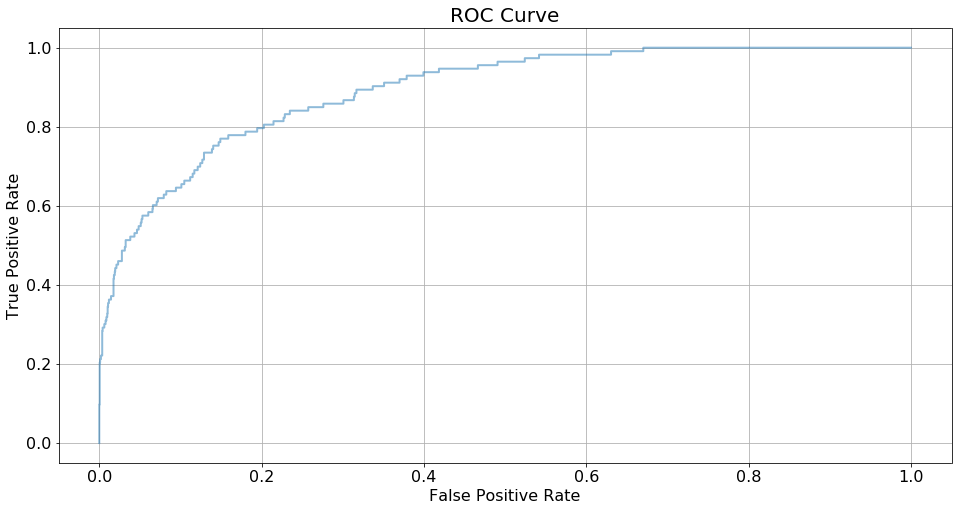

(array([0.        , 0.        , 0.        , ..., 0.99896801, 0.999484  ,
        1.        ]),
 array([0.        , 0.00884956, 0.01769912, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.78705832e-01, 9.65259710e-01, ...,
        2.77917339e-04, 2.73643444e-04, 0.00000000e+00]))

In [70]:
get_roc_curve(cat, 
              catboost_pool,
              thread_count=-1,
              plot=True)

In [71]:
pred_y = cat.predict(X_test)

In [72]:
eval_metric(Y_test, pred_y, 'AUC')

[0.617663040996557]

## AUC가 낮아 개선해보겠다. Imbalaced Dataset임을 보정해보자

In [73]:
np.sum(data['class']==0)

6474

In [74]:
np.sum(data['class']==1)

361

In [75]:
361/len(data)

0.052816386247256764

### 1인 클래스의 비율이 5%정도 밖에 안된다. 비율대로 가중치를 줘보자

In [81]:
weights = Y_train.copy()

In [82]:
weights = pd.to_numeric(weights)

In [83]:
weights[weights == 1] = sum(data['class'] == 0)/ sum(data['class'] == 1) 

In [84]:
weights[weights == 0] = 1

In [85]:
weights

691      1.000000
2553     1.000000
1264     1.000000
37      17.933518
5278     1.000000
          ...    
1985     1.000000
1456     1.000000
5894     1.000000
5438     1.000000
4917     1.000000
Name: class, Length: 4784, dtype: float64

### 가중치를 두고 예측을 해보자

In [86]:
cat_model = cat.fit(X_train, Y_train, sample_weight=weights)

Learning rate set to 0.0201
0:	learn: 0.6868153	total: 7.57ms	remaining: 7.56s
1:	learn: 0.6799970	total: 14.8ms	remaining: 7.41s
2:	learn: 0.6727470	total: 20.9ms	remaining: 6.96s
3:	learn: 0.6662937	total: 26.7ms	remaining: 6.64s
4:	learn: 0.6629054	total: 32.3ms	remaining: 6.42s
5:	learn: 0.6581280	total: 38ms	remaining: 6.3s
6:	learn: 0.6535544	total: 43.8ms	remaining: 6.21s
7:	learn: 0.6469086	total: 49.3ms	remaining: 6.11s
8:	learn: 0.6417999	total: 56.1ms	remaining: 6.18s
9:	learn: 0.6374151	total: 62.1ms	remaining: 6.15s
10:	learn: 0.6295095	total: 70.7ms	remaining: 6.36s
11:	learn: 0.6236082	total: 76.2ms	remaining: 6.27s
12:	learn: 0.6193447	total: 82.8ms	remaining: 6.28s
13:	learn: 0.6149483	total: 87.6ms	remaining: 6.17s
14:	learn: 0.6105822	total: 94.1ms	remaining: 6.18s
15:	learn: 0.6032384	total: 100ms	remaining: 6.17s
16:	learn: 0.5992267	total: 108ms	remaining: 6.22s
17:	learn: 0.5962013	total: 114ms	remaining: 6.21s
18:	learn: 0.5913131	total: 120ms	remaining: 6.18s
1

180:	learn: 0.3413585	total: 1.22s	remaining: 5.52s
181:	learn: 0.3409900	total: 1.23s	remaining: 5.51s
182:	learn: 0.3403421	total: 1.24s	remaining: 5.53s
183:	learn: 0.3395896	total: 1.25s	remaining: 5.53s
184:	learn: 0.3389091	total: 1.25s	remaining: 5.53s
185:	learn: 0.3383195	total: 1.26s	remaining: 5.51s
186:	learn: 0.3377389	total: 1.26s	remaining: 5.5s
187:	learn: 0.3371224	total: 1.27s	remaining: 5.49s
188:	learn: 0.3361725	total: 1.28s	remaining: 5.48s
189:	learn: 0.3352602	total: 1.28s	remaining: 5.47s
190:	learn: 0.3348920	total: 1.29s	remaining: 5.46s
191:	learn: 0.3343643	total: 1.29s	remaining: 5.45s
192:	learn: 0.3333676	total: 1.3s	remaining: 5.44s
193:	learn: 0.3327706	total: 1.31s	remaining: 5.43s
194:	learn: 0.3325874	total: 1.31s	remaining: 5.41s
195:	learn: 0.3315697	total: 1.32s	remaining: 5.4s
196:	learn: 0.3310446	total: 1.33s	remaining: 5.41s
197:	learn: 0.3299359	total: 1.33s	remaining: 5.4s
198:	learn: 0.3292249	total: 1.34s	remaining: 5.39s
199:	learn: 0.32

350:	learn: 0.2420119	total: 2.27s	remaining: 4.19s
351:	learn: 0.2412755	total: 2.27s	remaining: 4.18s
352:	learn: 0.2408377	total: 2.28s	remaining: 4.17s
353:	learn: 0.2402648	total: 2.28s	remaining: 4.17s
354:	learn: 0.2398667	total: 2.29s	remaining: 4.16s
355:	learn: 0.2391207	total: 2.3s	remaining: 4.15s
356:	learn: 0.2384554	total: 2.3s	remaining: 4.14s
357:	learn: 0.2379560	total: 2.31s	remaining: 4.14s
358:	learn: 0.2376821	total: 2.31s	remaining: 4.13s
359:	learn: 0.2370424	total: 2.32s	remaining: 4.12s
360:	learn: 0.2363786	total: 2.32s	remaining: 4.11s
361:	learn: 0.2356562	total: 2.33s	remaining: 4.11s
362:	learn: 0.2350630	total: 2.33s	remaining: 4.1s
363:	learn: 0.2348218	total: 2.34s	remaining: 4.09s
364:	learn: 0.2345227	total: 2.35s	remaining: 4.08s
365:	learn: 0.2340005	total: 2.35s	remaining: 4.07s
366:	learn: 0.2335287	total: 2.36s	remaining: 4.06s
367:	learn: 0.2330390	total: 2.36s	remaining: 4.06s
368:	learn: 0.2326224	total: 2.37s	remaining: 4.05s
369:	learn: 0.2

530:	learn: 0.1631987	total: 3.31s	remaining: 2.92s
531:	learn: 0.1628932	total: 3.31s	remaining: 2.91s
532:	learn: 0.1624594	total: 3.32s	remaining: 2.91s
533:	learn: 0.1621343	total: 3.32s	remaining: 2.9s
534:	learn: 0.1616868	total: 3.33s	remaining: 2.89s
535:	learn: 0.1613700	total: 3.33s	remaining: 2.89s
536:	learn: 0.1609031	total: 3.34s	remaining: 2.88s
537:	learn: 0.1605431	total: 3.35s	remaining: 2.87s
538:	learn: 0.1603101	total: 3.36s	remaining: 2.87s
539:	learn: 0.1598947	total: 3.36s	remaining: 2.86s
540:	learn: 0.1592034	total: 3.37s	remaining: 2.86s
541:	learn: 0.1586262	total: 3.37s	remaining: 2.85s
542:	learn: 0.1582148	total: 3.38s	remaining: 2.84s
543:	learn: 0.1577579	total: 3.38s	remaining: 2.84s
544:	learn: 0.1574941	total: 3.39s	remaining: 2.83s
545:	learn: 0.1570386	total: 3.4s	remaining: 2.82s
546:	learn: 0.1566838	total: 3.41s	remaining: 2.82s
547:	learn: 0.1561410	total: 3.41s	remaining: 2.81s
548:	learn: 0.1560297	total: 3.42s	remaining: 2.81s
549:	learn: 0.

694:	learn: 0.1104840	total: 4.35s	remaining: 1.91s
695:	learn: 0.1102304	total: 4.36s	remaining: 1.9s
696:	learn: 0.1101512	total: 4.37s	remaining: 1.9s
697:	learn: 0.1099874	total: 4.37s	remaining: 1.89s
698:	learn: 0.1097347	total: 4.38s	remaining: 1.89s
699:	learn: 0.1095810	total: 4.38s	remaining: 1.88s
700:	learn: 0.1092632	total: 4.39s	remaining: 1.87s
701:	learn: 0.1089991	total: 4.4s	remaining: 1.87s
702:	learn: 0.1088147	total: 4.4s	remaining: 1.86s
703:	learn: 0.1085106	total: 4.41s	remaining: 1.85s
704:	learn: 0.1083139	total: 4.41s	remaining: 1.85s
705:	learn: 0.1081174	total: 4.42s	remaining: 1.84s
706:	learn: 0.1078381	total: 4.43s	remaining: 1.83s
707:	learn: 0.1076706	total: 4.43s	remaining: 1.83s
708:	learn: 0.1074452	total: 4.44s	remaining: 1.82s
709:	learn: 0.1071970	total: 4.45s	remaining: 1.82s
710:	learn: 0.1070200	total: 4.46s	remaining: 1.81s
711:	learn: 0.1068190	total: 4.46s	remaining: 1.81s
712:	learn: 0.1065533	total: 4.47s	remaining: 1.8s
713:	learn: 0.106

860:	learn: 0.0781333	total: 5.41s	remaining: 873ms
861:	learn: 0.0780356	total: 5.41s	remaining: 867ms
862:	learn: 0.0778370	total: 5.42s	remaining: 861ms
863:	learn: 0.0776007	total: 5.44s	remaining: 856ms
864:	learn: 0.0773995	total: 5.44s	remaining: 850ms
865:	learn: 0.0772313	total: 5.45s	remaining: 843ms
866:	learn: 0.0770879	total: 5.46s	remaining: 837ms
867:	learn: 0.0769064	total: 5.47s	remaining: 833ms
868:	learn: 0.0768228	total: 5.48s	remaining: 826ms
869:	learn: 0.0766849	total: 5.49s	remaining: 820ms
870:	learn: 0.0765530	total: 5.49s	remaining: 814ms
871:	learn: 0.0764176	total: 5.5s	remaining: 808ms
872:	learn: 0.0763333	total: 5.51s	remaining: 801ms
873:	learn: 0.0761326	total: 5.51s	remaining: 795ms
874:	learn: 0.0759838	total: 5.52s	remaining: 789ms
875:	learn: 0.0758416	total: 5.53s	remaining: 782ms
876:	learn: 0.0756544	total: 5.53s	remaining: 776ms
877:	learn: 0.0756055	total: 5.55s	remaining: 771ms
878:	learn: 0.0754599	total: 5.55s	remaining: 764ms
879:	learn: 0

In [87]:
pred_y = cat_model.predict(X_test)

In [88]:
pred_y.sum()

88

In [89]:
len(pred_y)

2051

In [90]:
eval_metric(Y_test,pred_y, 'AUC')

[0.692703909696156]

## 개선이 되긴 했는데.. 아직 좀 아쉽다 ㅠㅠ